<a href="https://colab.research.google.com/github/AnnaTashchilova/Toxic-Comment-Classification-Challenge/blob/main/Toxic_comments_TashchilovaAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r ./drive/MyDrive/toxic_comments/* .

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

#Toxic comment classification

В данном исследовании был выполнен анализ комментариев из Википедии с целью выявления из них токсичных, то есть содержаших насилие, непристойные выражения, ненависть, угрозу и т.д.
Данные для исследования представлены на платформе Kaggle: 
https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge 
и содержат TRAIN выборку, TEST выборку и TEST LABELS, правильная классификация для теста, выложенная после окончания соревнования.
В соревновании предлагается выполнить multilabel классификацию комментариев, то есть один комментарий может принадлежать сразу нескольким классам токсичности:

*   Toxic – обычные токсичные
*   Severe_toxic – сильно токсичные
*   Obscene - непристойные
*   Threat - комментарии, содержащие насилие
*   Insult - комментарии, содержащие угрозу
*   Identity_hate - комментарии, содержащие ненависть к личности








#Загрузка данных

In [ ]:
data_train = pd.read_csv('train.csv')

In [ ]:
data_test = pd.read_csv('test.csv')
data_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


Поскольку часть датасета test_labels содержит -1 в значениях всех классов токсичности, что означает, что данные комментрии не участвовали в подсчете score на платформе Kaggle и, соответственно, мы не знаем их правильную классификацию, то от таких комментариев будет очищен как TEST , так и TEST_LABELS.

In [ ]:
data_test_labels = pd.read_csv('test_labels.csv')
data_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
test_mask = ~data_test_labels['toxic']<0

In [ ]:
df_labels = data_test_labels[test_mask]
df_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0


In [ ]:
data_test = data_test[test_mask]
data_test.head()

,id,comment_text
5,0001ea8717f6de06,Thank you for understanding. I think very high...
7,000247e83dcc1211,:Dear god this site is horrible.
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig..."
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ..."
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l..."


In [ ]:
data_test_labels.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data_train['comment_text'].iloc[4]

"You, sir, are my hero. Any chance you remember what page that's on?"

Пропусков в данных обнаружено не было.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
data_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_train.nunique()

id               159571
comment_text     159571
toxic                 2
severe_toxic          2
obscene               2
threat                2
insult                2
identity_hate         2
dtype: int64

#EDA

In [ ]:
negative_cat = list(data_train.columns.values)[2:]
counts = []
for category in negative_cat:
    counts.append((category, data_train[category].sum()))
data_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
data_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Text(0, 0.5, 'Количество комментариев')

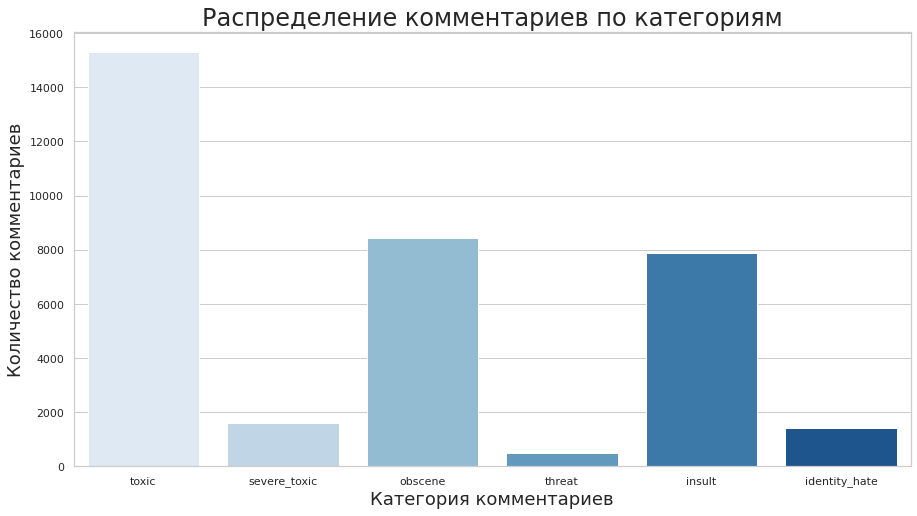

In [ ]:
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))

plt.title("Распределение комментариев по категориям", fontsize=24)
plt.ylabel('Количество комментариев', fontsize=18)
plt.xlabel('Категория комментариев', fontsize=18)

ax= sns.barplot(x=negative_cat, y=data_stats['number of comments'], palette='Blues')
plt.ylabel('Количество комментариев', fontsize=18)

Как видно из распределения комментариев по категориям, выборка не сбалансирована как по принципу чистые/токсичные (143346/16225), так и по классам токсичности комментариев. Возможно, при дальнейшей классификации будут возникать проблемы именно с самыми малочисленными классами: severe_toxic, threat, identity_hate.

Рассмотрим самую малочисленную категорию 'threat' (478 комментариев) и проверим сколько из них принадлежат только данной категории. Таких комментариев насчитывается только 22, что крайне мало для такой большой выборки.

In [ ]:
threat_comments = data_train[(data_train['threat'] ==1) & (data_train['toxic'] ==0) & (data_train['obscene'] ==0) & (data_train['insult'] ==0)]
threat_comments

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
3712,09eb7d87b8c24ca5,Please stop. If you continue to ignore our pol...,0,0,0,1,0,0
16939,2cb0ead532923065,That's funny. You was personally offended? So ...,0,0,0,1,0,0
17210,2d6e671ffae726a3,Wow dude. As your physician I suggest you sli...,0,0,0,1,0,0
29295,4db479fe05e88395,Regarding your passing \n\nBecause you willful...,0,0,0,1,0,0
48209,80e0b91bdea43fd3,personal attacks \n\ndont tell me what i can a...,0,0,0,1,0,0
51307,8947f2c12aea0a32,"If no-one beats me to it, I'll knock something...",0,0,0,1,0,0
53841,8fd45641216fdfde,Wikistalking \n\nUnless you wish to be targete...,0,0,0,1,0,0
56561,971494c52942a6cc,"Our warning to you ,Weare not afraid of you b...",0,0,0,1,0,0
63559,aa1046cda3637efe,I KNOW IT'S ENGLAND BECAUSE IT SAYS UTC \n\nIN...,0,0,0,1,0,0
85348,e44b83f9338b5ade,I shalt sever thy head at the neck. \n\nIt wil...,0,0,0,1,0,0


In [ ]:
threat_comments['comment_text'].iloc[8]

"I KNOW IT'S ENGLAND BECAUSE IT SAYS UTC \n\nIN FACT I'LL BLOW UP UK AND IRELAND!"

In [ ]:
super_toxic_comments = data_train[(data_train['threat'] ==1) & (data_train['severe_toxic'] ==1) & (data_train['obscene'] ==1) & (data_train['insult'] ==1) & (data_train['toxic'] ==1) & (data_train['identity_hate'] ==1)]

In [ ]:
super_toxic_comments['comment_text'].iloc[5]

'FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF SHIT I HOPE YOU DIE IN A HORRIBLE FIRE WITH YOUR GAY ASS KIDS I WILL SLIT THEIR THROAT YOU MOTHERFUCKER DONT YOU EVER THINK OF BANNING ME AGAIN OR I WILL RAPE YOU ANALLY!!!!!'

In [ ]:
toxic_comments = data_train[(data_train['threat'] ==0) & (data_train['severe_toxic'] ==0) & (data_train['obscene'] ==0) & (data_train['insult'] ==0) & (data_train['toxic'] ==1) & (data_train['identity_hate'] ==0)]
toxic_comments['comment_text'].iloc[5]

'"\n\nUNBLOCK ME OR I\'LL GET MY LAWYERS ON TO YOU FOR BLOCKING MY CONSTITUTIONAL RIGHT TO FREE SPEECH"'

In [ ]:
severe_toxic_comments = data_train[(data_train['threat'] ==0) & (data_train['severe_toxic'] ==1) & (data_train['obscene'] ==0) & (data_train['insult'] ==0) & (data_train['toxic'] ==0) & (data_train['identity_hate'] ==0)]
severe_toxic_comments
#severe_toxic_comments['comment_text'].iloc[5]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [ ]:
obscene_comments = data_train[(data_train['threat'] ==0) & (data_train['severe_toxic'] ==0) & (data_train['obscene'] ==1) & (data_train['insult'] ==0) & (data_train['toxic'] ==0) & (data_train['identity_hate'] ==0)]
obscene_comments['comment_text'].iloc[5]

"jd2718 the sock fiend \n\nnow hes lying out his ass on the ani page but I can't comment. and no im not this m1rth person, im just me."

In [ ]:
insult_comments = data_train[(data_train['threat'] ==0) & (data_train['severe_toxic'] ==0) & (data_train['obscene'] ==0) & (data_train['insult'] ==1) & (data_train['toxic'] ==0) & (data_train['identity_hate'] ==0)]
insult_comments['comment_text'].iloc[5]

"Yeah, this guys deleting potentially life saving information citing that the article 'doesn't look very pretty with real information', I call him a nerd and have a go at him for doing so, and I'm in the wrong. Nice to see your a human being mate. Remind me to steer clear of 'people' like you.124.176.226.45"

In [ ]:
hate_comments = data_train[(data_train['threat'] ==0) & (data_train['severe_toxic'] ==0) & (data_train['obscene'] ==0) & (data_train['insult'] ==0) & (data_train['toxic'] ==0) & (data_train['identity_hate'] ==1)]
hate_comments['comment_text'].iloc[5]

'" name was Willie, and he said he was standing about three people away from Elvis at the Patton Hotel in the fifties, and he overheard Elvis say, ""All a nigger can do for me is buy my records and shine my shoes."""'

#Preprocessing

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.probability import FreqDist
from nltk.util import bigrams, ngrams
import wordcloud
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize

import re
import string

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Preprocessing играет важную роль в дальнейшей успешной или неуспешной классификации текста. Поэтому для каждого комментария из обучающей и тестовой выборок были проведены следующие операции:

1.   Игнорируются все знаки препинания, цифры, слова, состоящии из одной или двух букв.
2.   Апостроф несет смысловую нагрузку только если находится в середине слова, тогда часть после апострофа убирается, так как не несет смысловой нагрузки.
3.   Далее используется лемматизатор, в который передается часть речи и слово приводится к начальной форме.
4.   На последнем этапе удаляются stop слова из словаря 'english'.

В результате получается список из слов, с которым будет удобно работать.




In [ ]:
comments = data_train['comment_text']

In [ ]:
stop_words = set(stopwords.words('english') + list(string.ascii_lowercase))

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        
        return wordnet.NOUN 

In [ ]:
def preprocess(text):

    tokens = [word.lower().split("'")[0] for word in re.findall("[a-zA-Z]+'?[a-zA-Z]+", text)]
    
    lemmatizer = WordNetLemmatizer()

    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag([word])[0][1])) for word in tokens]
    
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [ ]:
def delete_stop_words(list_of_words):
    return [word for word in list_of_words if word not in wordcloud.STOPWORDS]

Train preprocessing

In [ ]:
data_train['comments'] = data_train['comment_text'].apply(preprocess)

In [ ]:
data_train['comments'] = data_train['comments'].apply(delete_stop_words)
data_train.to_csv('train_preprocessed.csv', index=False)

In [ ]:
df_train = pd.read_csv('train_preprocessed.csv')
df_train['comments'][4]

"['sir', 'hero', 'chance', 'remember', 'page']"

In [ ]:
def comment_words_extract(string_of_words):
    return re.findall("[a-z]+", string_of_words)

In [ ]:
df_train['comments'] = df_train['comments'].apply(comment_words_extract)

In [ ]:
df_train['comments'][4]

['sir', 'hero', 'chance', 'remember', 'page']

Test preprocessing

In [ ]:
data_test['comments'] = data_test['comment_text'].apply(preprocess)

In [ ]:
data_test['comments'] = data_test['comments'].apply(delete_stop_words)
data_test.to_csv('test_preprocessed.csv', index=False)

In [ ]:
df_test = pd.read_csv('test_preprocessed.csv')
df_test['comments'][4]

"['add', 'new', 'product', 'list', 'make', 'sure', 'relevant', 'add', 'new', 'product', 'list', 'make', 'sure', 'wikipedia', 'entry', 'already', 'prove', 'relevance', 'give', 'reader', 'possibility', 'read', 'subject', 'deletion', 'see', 'article', 'revision', 'history']"

In [ ]:
df_test['comments'] = df_test['comments'].apply(comment_words_extract)

#Word Cloud

В данном разделе рассмотрим какие слова наиболее часто встречаются в токсичных комментариях, а какие в не токсичных, будем называть такие комментарии 'чистыми'. Также построим облако слов для наглядной визуализации.

In [ ]:
df_cloud = df_train
df_cloud['clear'] = 1 - df_cloud[df_cloud.columns[2:]].max(axis=1)

<ipython-input-65-971ee3f5db39>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cloud['clear'] = 1 - df_cloud[df_cloud.columns[2:]].max(axis=1)


In [ ]:
df_cloud[df_cloud['clear'] ==1].count()

id               143346
comment_text     143346
toxic            143346
severe_toxic     143346
obscene          143346
threat           143346
insult           143346
identity_hate    143346
comments         143346
clear            143346
dtype: int64

In [ ]:
df_cloud[df_cloud['clear'] ==0].count()

id               16225
comment_text     16225
toxic            16225
severe_toxic     16225
obscene          16225
threat           16225
insult           16225
identity_hate    16225
comments         16225
clear            16225
dtype: int64

Обратим внимание, что комментарии, принадлежащие хотя бы одному классу токсичности (не чистые) составляют всего 11.3% от всей обучающей выборки. Данный факт будет накладывать ограничения на использование некоторых метрик качества в процессе классификации.

In [ ]:
words_from_toxic_comments = [word for word_list in df_cloud[df_cloud['clear'] == 0]\
                             ['comments'].values for word in word_list]

words_from_clear_comments = [word for word_list in df_cloud[df_cloud['clear'] == 1]\
                             ['comments'].values for word in word_list]

In [ ]:
len(words_from_toxic_comments), len(words_from_clear_comments)

(442503, 4872268)

In [ ]:
fdist_toxic = FreqDist(words_from_toxic_comments)
fdist_clear = FreqDist(words_from_clear_comments)
fdist_all = FreqDist(words_from_toxic_comments + words_from_clear_comments)

In [ ]:
fdists = [fdist_toxic, fdist_clear, fdist_all]
titles = ['Токсичные', 'Чистые', 'Все']

for fdist, title in zip(fdists, titles):
    print(title + ' комментарии:')
    print('{:<12}{:<7}'.format('Слово', 'Частота'))
    for (word, freq) in fdist.most_common(10):
        print('{:<12}{:>5}'.format(word + ':', freq))
    print('\n')

Токсичные комментарии:
Слово       Частота
fuck:       13572
suck:        4824
go:          4330
wikipedia:   3939
shit:        3726
nigger:      3434
page:        2871
hate:        2713
faggot:      2709
know:        2626


Чистые комментарии:
Слово       Частота
article:    72418
page:       54425
wikipedia:  44686
talk:       38585
use:        30970
edit:       29105
one:        28963
please:     28782
make:       28307
see:        24282


Все комментарии:
Слово       Частота
article:    74551
page:       57296
wikipedia:  48625
talk:       40499
use:        32020
edit:       30849
one:        30748
make:       30562
please:     29826
see:        25569




Среди наиболее встречающихся слов как в чистых, так и в токсичных комментариях есть пересечения. Так, слово 'wikipedia' и 'page' попали в топ-10 слов по встречамости в обоих категориях. Это объясняется источником, откуда были набраны комментарии для данного датасета.

In [ ]:
toxic_text = ' '.join(words_from_toxic_comments)
clear_text = ' '.join(words_from_clear_comments)

In [ ]:
cloud_params = {
    'max_words': 200,
    'regexp': '[a-z]+',
    'collocations': False,
    
    'width': 2400,
    'height': 1200,
    'margin': 5,
    
    'relative_scaling': 1,
    'prefer_horizontal': 1,
    'min_font_size': 20,
    'font_step': 2,
 
    'background_color': None,
    'mode': 'RGBA',
    
    'random_state': 42
}

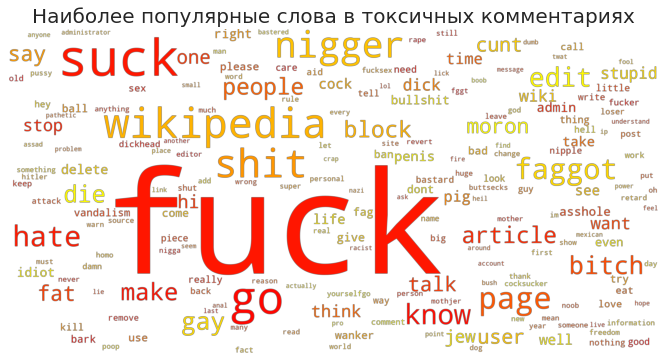

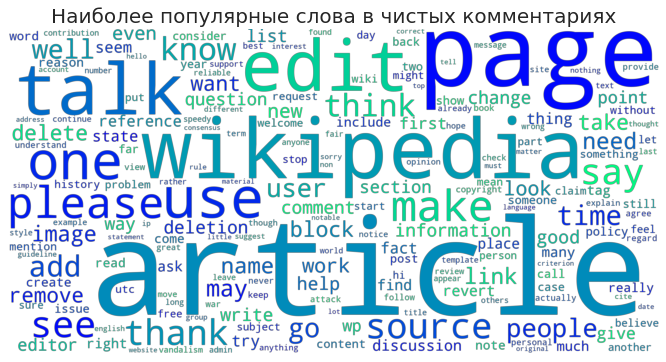

In [ ]:
texts = [toxic_text, clear_text]
cmaps = ['autumn', 'winter']
titles = ['токсичных', 'чистых']

for text, cmap, title in zip(texts, cmaps, titles):
    word_cloud = WordCloud(colormap=cmap, **cloud_params)
    word_cloud.generate(text)
    plt.figure(figsize=(12, 6))
    plt.axis('off')
    plt.title('Наиболее популярные слова в {} комментариях'.format(title), fontsize=20)
    plt.imshow(word_cloud, interpolation='bilinear')

#Этап 1. Bag of Words

В первом разделе работы воспользуемся простым методом Bag of Words, то есть без какой-либо обработки контекта и т.д., переведем список слов из комментариев в вектор и воспользуемся двумя классификаторами: XGBClassifier, LogicticRegression, и просмотрим на полученные результаты с целью определить приоритетный классификатор, а также выбрать наиболее показательные метрики оценки качества созданной модели.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
comments_train = df_train['comments']
comments_train = [' '.join(_) for _ in comments_train]

In [ ]:
comments_test = df_test['comments']
comments_test = [' '.join(_) for _ in comments_test]

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(comments_train)
X_test = vectorizer.transform(comments_test)

In [ ]:
y_train = df_train.loc[:,['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
y_test = df_labels.loc[:,['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

Задача multilabeled, или многокомпонентной, классификации имеет некоторые существенные отличия от простой многоклассовой классификации. Одним из подходов к решению проблемы с несколькими метками состоит в том, чтобы разбить ее на несколько независимых задач двоичной классификации (по одной на категорию).
В стратегии «OneVsRest» можно построить несколько независимых классификаторов и, для невидимого экземпляра, выбрать класс, для которого доверие максимально.
Однако, основным предположением здесь является то, что метки взаимоисключающие и корреляция между классами в этом методе не учитывается. А как видно из раздела EDA в нашем датасете не существует комментариев принадлежащих классу 'сильно токсичные' и при этом не принадлежащих классу 'токсичные'. Также в таком подходе может возникать переобучение, так как почти 90% выборки это 'чистые' комментарии.


###XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

clf_multilabel = OneVsRestClassifier(XGBClassifier())

In [ ]:
clf_multilabel.fit(X_train, y_train)
pred_proba = clf_multilabel.predict_proba(X_test)

In [ ]:
pred_proba

array([[5.6824137e-02, 4.3966696e-03, 2.7746744e-02, 1.7335328e-03,
        3.4830462e-02, 5.6670001e-03],
       [7.8844346e-02, 5.3627188e-03, 2.7746744e-02, 1.9997242e-03,
        3.4830462e-02, 5.6670001e-03],
       [1.3244656e-01, 1.7806370e-03, 3.1263344e-02, 9.2552288e-04,
        1.5430202e-02, 2.2564803e-03],
       ...,
       [3.1586581e-01, 8.3662951e-03, 3.9825782e-02, 1.9997242e-03,
        9.3528561e-02, 1.9718897e-01],
       [8.9760029e-01, 1.9601305e-01, 9.3379724e-01, 2.1715167e-03,
        8.4226245e-01, 4.4245884e-02],
       [6.9623351e-02, 5.3627188e-03, 2.4110187e-02, 1.3860804e-03,
        3.2679334e-02, 5.6670001e-03]], dtype=float32)

In [ ]:
y_test_array = np.array(y_test)

In [ ]:
y_test_array

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [ ]:
 print('ROC-AUC score is {}'.format(roc_auc_score(y_test_array, pred_proba)))

ROC-AUC score is 0.9488831552741949


In [ ]:
pred_proba>0.5

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [ True, False,  True, False,  True, False],
       [False, False, False, False, False, False]])

In [ ]:
accuracy_score(y_test_array, pred_proba>0.5)

0.8995435931101317

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
report = classification_report(y_test_array, pred_proba>0.5)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.38      0.48      6090
           1       0.53      0.19      0.28       367
           2       0.68      0.48      0.57      3691
           3       0.53      0.08      0.13       211
           4       0.65      0.36      0.46      3427
           5       0.68      0.21      0.32       712

   micro avg       0.67      0.38      0.49     14498
   macro avg       0.62      0.28      0.37     14498
weighted avg       0.66      0.38      0.48     14498
 samples avg       0.04      0.03      0.03     14498



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_proba_bool = pred_proba>0.5
pred_proba_bool

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [ True, False,  True, False,  True, False],
       [False, False, False, False, False, False]])

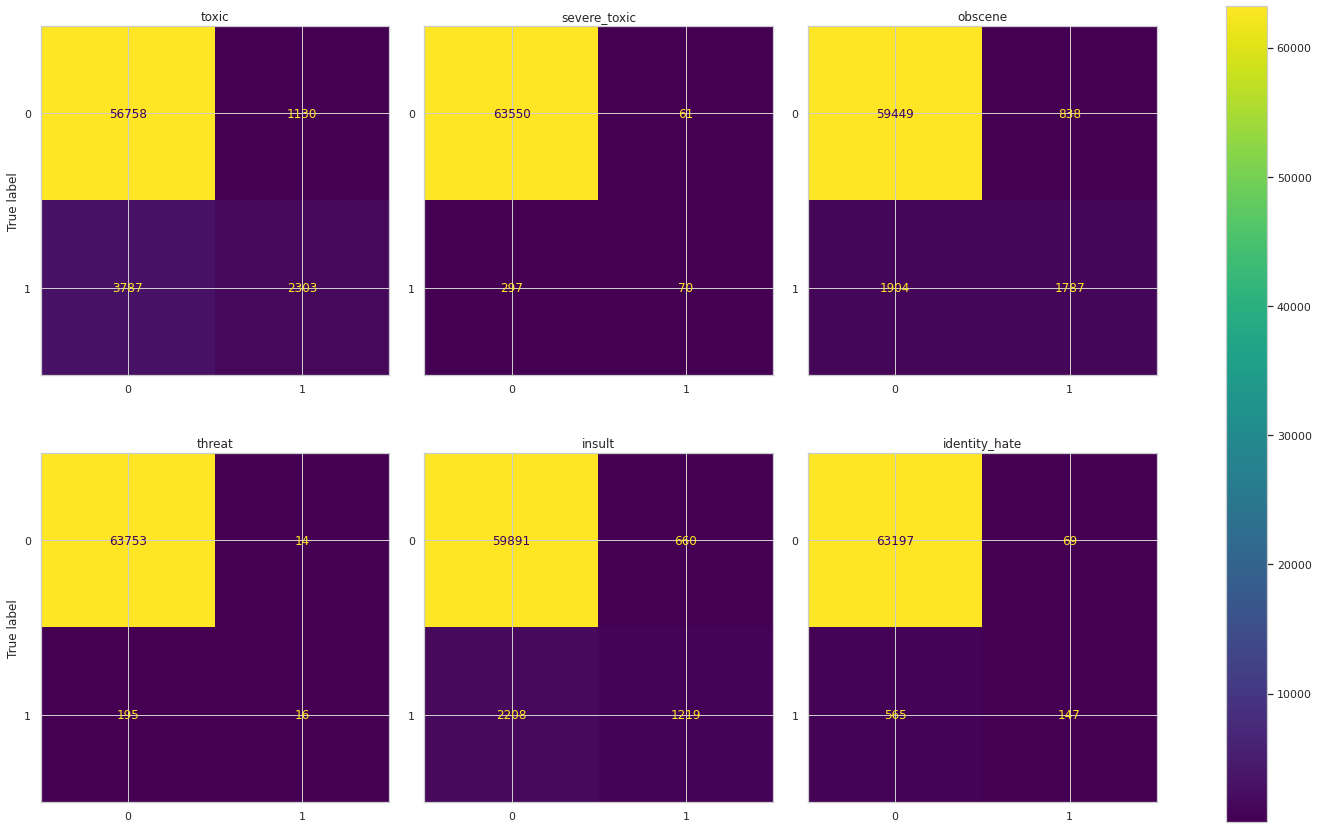

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
f, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_array[:, i],
                                                   pred_proba_bool[:,i]),
                                  display_labels=[0, 1])
    disp.plot(ax=axes[i], values_format='.6g')
    disp.ax_.set_title(labels[i])
    if i<10:
        disp.ax_.set_xlabel('')
    if i%3!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

Выводы XGBClassifier. 
Согласно визуализации, представленной выше, видно, что классификация прошла не очень успешно. Малонеселенный класс 'threat' плохо различим подобной моделью, также малочисленный, а главное зависимый от 'toxic', класс 'severe_toxic' также плохо классифицирован.
Несмотря на это, благодаря хорошей идентификации чистых комментариев, метрика ROC-AUC получилась хорошей - 0.95. Таким образом, данная метрика качества не репрезантативна, однако, считать ее продолжим, для наглядности.
 


Действительно показательной является метрика F1 - score по классам. Также можно ориентироваться на precision и recall.
Рассмотрим classification report, из которого видно, что хуже всего идентифицировались малочисленные классы. А лучше всего (F1-score = 0.57) класс 'obscene' (комментарии, содержащие непристойные выражения), что в целом логично следует из используемого метода 'мешок слов' и названия категории. В ней достаточно найти нужные слова и категория станет легко определяемой.

###LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf_multilabel_LG = OneVsRestClassifier(LogisticRegression())

In [ ]:
clf_multilabel_LG.fit(X_train, y_train)
pred_proba_LG = clf_multilabel_LG.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC score is {}'.format(roc_auc_score(y_test_array, pred_proba_LG)))

ROC-AUC score is 0.9371639211852324


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
report = classification_report(y_test_array, pred_proba_LG>0.5)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.72      0.64      6090
           1       0.42      0.41      0.41       367
           2       0.64      0.64      0.64      3691
           3       0.23      0.25      0.24       211
           4       0.62      0.46      0.53      3427
           5       0.43      0.16      0.23       712

   micro avg       0.59      0.60      0.59     14498
   macro avg       0.49      0.44      0.45     14498
weighted avg       0.59      0.60      0.58     14498
 samples avg       0.06      0.06      0.06     14498



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_proba_LG_bool = pred_proba_LG>0.5
pred_proba_LG_bool

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [ True, False, False, False, False, False],
       [ True, False,  True, False,  True, False],
       [False, False, False, False, False, False]])

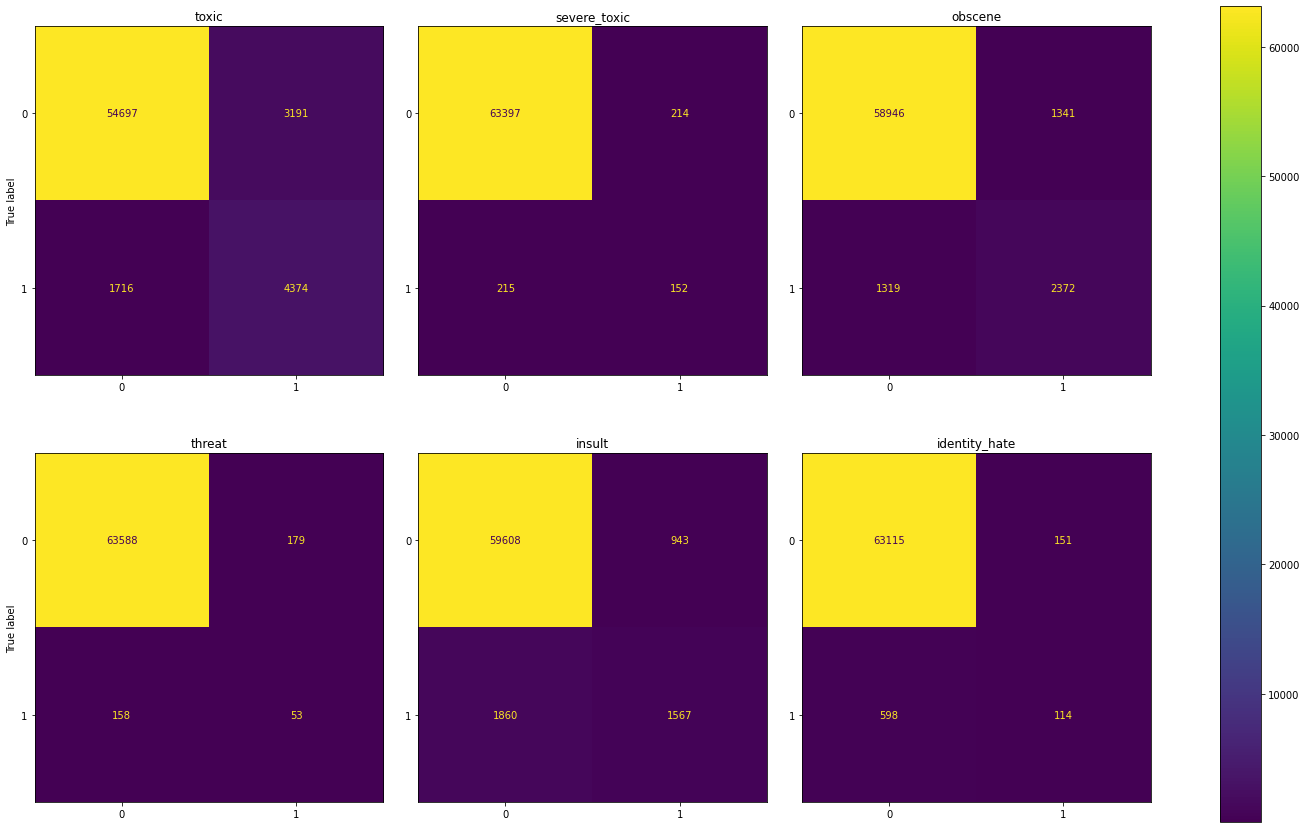

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
f, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_array[:, i],
                                                   pred_proba_LG_bool[:,i]),
                                  display_labels=[0, 1])
    disp.plot(ax=axes[i], values_format='.6g')
    disp.ax_.set_title(labels[i])
    if i<10:
        disp.ax_.set_xlabel('')
    if i%3!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

Выводы LogisticRegression.
Рассмотрим classification report, из которого видно, что хуже всего по-прежнему идентифицировались малочисленные классы. А лучше всего (F1-score = 0.64) класс 'obscene' и 'toxic'(самый многочисленный). В целом метрика F1-score по всем классам улучшилась и достигла значения 0.59, что лучше, чем аналогичная, полученная в XGBClassifier. Это объяснимо тем, что наилучшие параметры в XGBC не подбирались.

#Этап 2. TF-IDF

Следующим этапом работы был выбран другой способ векторизации текста комментариев с учетом важности контекста (TF-IDF). 

*TF-IDF (TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.*

Полученный вектор используется для таких же как и на предыдущем этапе двух классификаторов: XGBClassifier, LogicticRegression.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
word_vectorizer = TfidfVectorizer(analyzer='word',
                                  stop_words=None,
                                  lowercase=False,
                                  token_pattern="[a-z]+",
                                  max_features=None,
                                  min_df=6,
                                  max_df=1.0)

In [ ]:
X_train = word_vectorizer.fit_transform(comments_train)
X_test = word_vectorizer.transform(comments_test)

###XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

clf_multilabel_XGBC = OneVsRestClassifier(XGBClassifier())

In [ ]:
clf_multilabel_XGBC.fit(X_train, y_train)
pred_proba_XGBC = clf_multilabel_XGBC.predict_proba(X_test)

In [ ]:
 print('ROC-AUC score is {}'.format(roc_auc_score(y_test_array, pred_proba_XGBC)))

ROC-AUC score is 0.9496768750047377


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
report = classification_report(y_test_array, pred_proba_XGBC>0.5)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.43      0.54      6090
           1       0.43      0.11      0.18       367
           2       0.72      0.50      0.59      3691
           3       0.54      0.10      0.17       211
           4       0.70      0.38      0.50      3427
           5       0.81      0.24      0.37       712

   micro avg       0.71      0.42      0.53     14498
   macro avg       0.65      0.30      0.39     14498
weighted avg       0.70      0.42      0.52     14498
 samples avg       0.04      0.03      0.04     14498



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_proba_XGBC_bool = pred_proba_XGBC>0.5
pred_proba_XGBC_bool

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [ True, False,  True, False,  True, False],
       [False, False, False, False, False, False]])

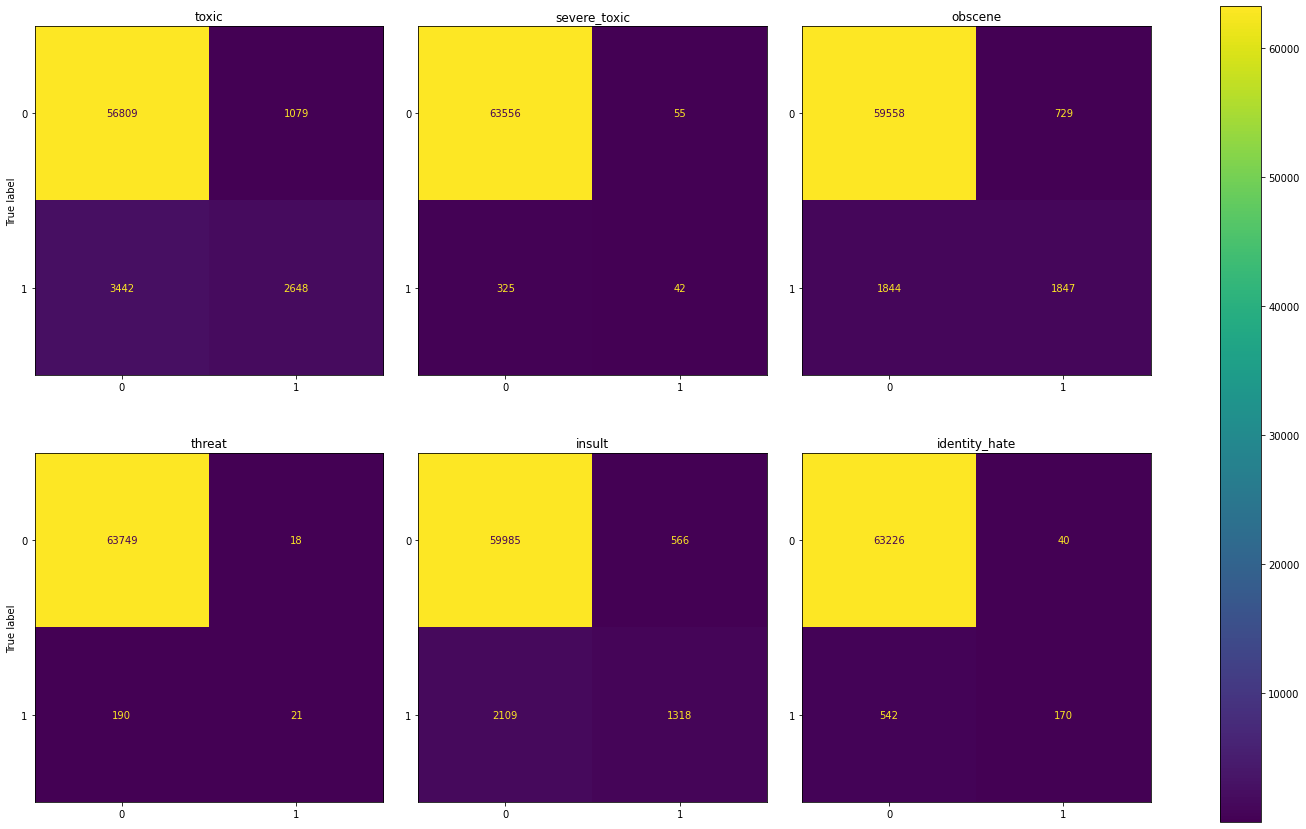

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
f, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_array[:, i],
                                                   pred_proba_XGBC_bool[:,i]),
                                  display_labels=[0, 1])
    disp.plot(ax=axes[i], values_format='.6g')
    disp.ax_.set_title(labels[i])
    if i<10:
        disp.ax_.set_xlabel('')
    if i%3!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

Выводы XGBClassifier.
Рассмотрим classification report, из которого видно, что хуже всего по-прежнему идентифицировались малочисленные классы.  В целом метрика F1-score по всем классам улучшилась и достигла значения 0.53, что лучше, чем аналогичная, полученная в XGBClassifier на первом этапе с помощью BagOfWords. 


###LogisticRegression

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

clf_multilabel_LG_2 = OneVsRestClassifier(LogisticRegression())

In [ ]:
clf_multilabel_LG_2.fit(X_train, y_train)
pred_proba_LG_2 = clf_multilabel_LG_2.predict_proba(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('ROC-AUC score is {}'.format(roc_auc_score(y_test_array, pred_proba_LG_2)))

ROC-AUC score is 0.9750392449290998


In [ ]:
report = classification_report(y_test_array, pred_proba_LG_2>0.5)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      6090
           1       0.37      0.29      0.33       367
           2       0.75      0.62      0.68      3691
           3       0.41      0.14      0.21       211
           4       0.73      0.51      0.60      3427
           5       0.69      0.25      0.37       712

   micro avg       0.68      0.60      0.64     14498
   macro avg       0.60      0.42      0.48     14498
weighted avg       0.69      0.60      0.63     14498
 samples avg       0.06      0.06      0.06     14498



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_proba_LG_2_bool = pred_proba_LG_2>0.5

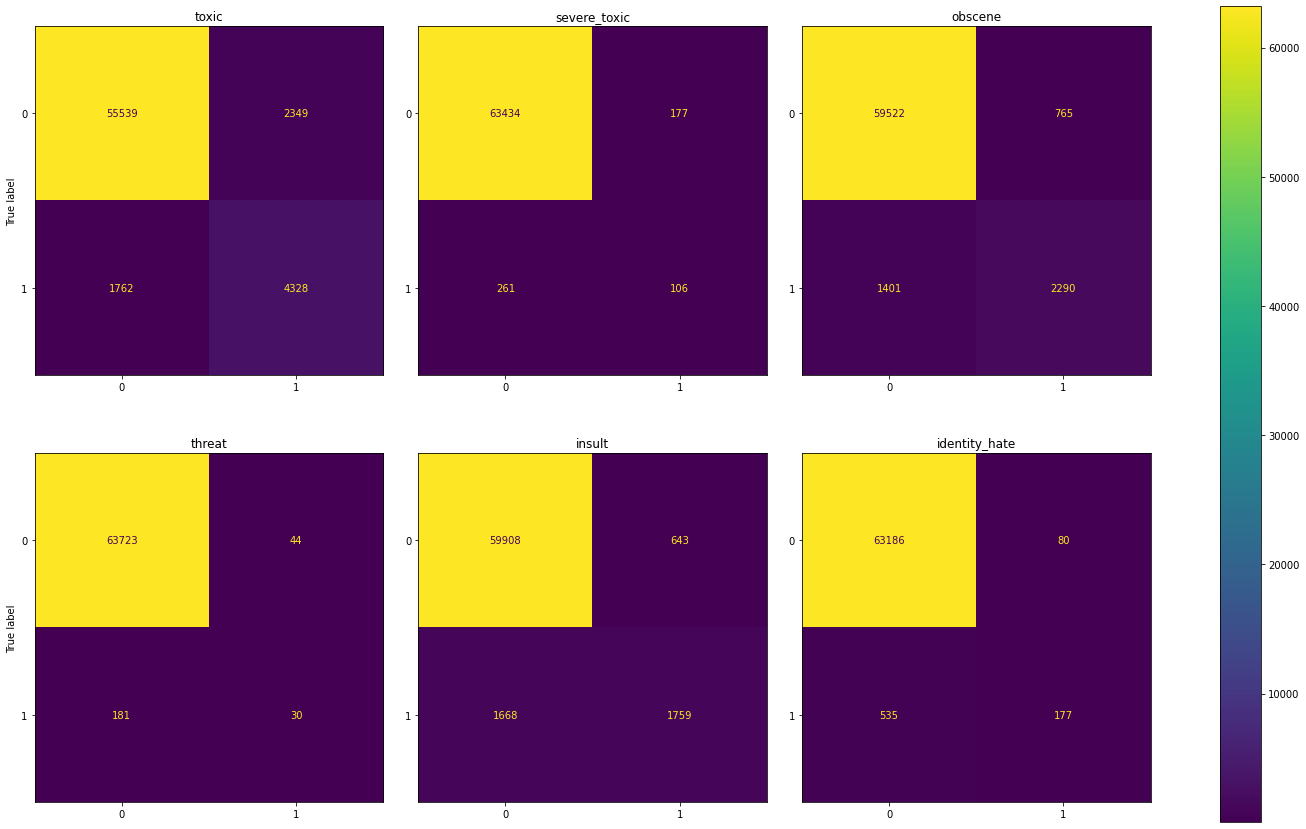

In [ ]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
f, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_array[:, i],
                                                   pred_proba_LG_2_bool[:,i]),
                                  display_labels=[0, 1])
    disp.plot(ax=axes[i], values_format='.6g')
    disp.ax_.set_title(labels[i])
    if i<10:
        disp.ax_.set_xlabel('')
    if i%3!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

Выводы LogisticRegression.
Рассмотрим classification report, из которого видно, что хуже всего по-прежнему идентифицировались малочисленные классы. А лучше всего (F1-score = 0.68) класс 'obscene' и 'toxic'(самый многочисленный). В целом метрика F1-score по всем классам улучшилась и достигла значения 0.64, что лучше, чем аналогичная, полученная тем же методом на предыдущим этапом с помощью BagOfWords, что говорит о важности контекста при анализе тональности текста. Логистическая регрессия лучше справляется, возможно, из-за отсутствия подбора параметров у XGBClassifier

#Этап 3. DistilBERT

Следующим этапом работы было пострение модели с использованием DistilBERT. Для ее реализации приведем данные в TRAIN  и TEST выборках к необходимому формату - 'text' (строка комментария после preprocessing) и 'labels' ( в формате [0, 0, 0, 0, 0]).

###Train

In [ ]:
df_train['comments'] = [' '.join(_) for _ in df_train['comments']]

In [ ]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comments
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits make username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,match background colour seemingly stuck thanks...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wonder sectio...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page


In [ ]:
df_train['labels'] = df_train.iloc[:, 2:8].values.tolist()
df_train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comments,labels
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits make username hardcore metal...,"[0, 0, 0, 0, 0, 0]"
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,match background colour seemingly stuck thanks...,"[0, 0, 0, 0, 0, 0]"
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really try edit war guy constantly rem...,"[0, 0, 0, 0, 0, 0]"
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,make real suggestion improvement wonder sectio...,"[0, 0, 0, 0, 0, 0]"
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page,"[0, 0, 0, 0, 0, 0]"


In [ ]:
df_train.drop(columns=df_train.columns[3], axis= 1 , inplace= True )

In [ ]:
df_train.drop(columns=df_train.columns[1:5], axis= 1 , inplace= True )

In [ ]:
df_train.drop(columns=df_train.columns[0:2], axis= 1 , inplace= True )

In [ ]:
df_train.drop(columns=df_train.columns[0], axis= 1 , inplace= True )

In [ ]:
df_train.head()

,comments,labels
0,explanation edits make username hardcore metal...,"[0, 0, 0, 0, 0, 0]"
1,match background colour seemingly stuck thanks...,"[0, 0, 0, 0, 0, 0]"
2,hey man really try edit war guy constantly rem...,"[0, 0, 0, 0, 0, 0]"
3,make real suggestion improvement wonder sectio...,"[0, 0, 0, 0, 0, 0]"
4,sir hero chance remember page,"[0, 0, 0, 0, 0, 0]"


In [ ]:
df_train = df_train.rename(columns = {'comments':'text'})

In [ ]:
df_train.head()

,text,labels
0,explanation edits make username hardcore metal...,"[0, 0, 0, 0, 0, 0]"
1,match background colour seemingly stuck thanks...,"[0, 0, 0, 0, 0, 0]"
2,hey man really try edit war guy constantly rem...,"[0, 0, 0, 0, 0, 0]"
3,make real suggestion improvement wonder sectio...,"[0, 0, 0, 0, 0, 0]"
4,sir hero chance remember page,"[0, 0, 0, 0, 0, 0]"


###Test

In [ ]:
df_test['comments'] = [' '.join(_) for _ in df_test['comments']]

In [ ]:
df_test.head()

,id,comment_text,comments
0,0001ea8717f6de06,Thank you for understanding. I think very high...,thank understand think highly revert without d...
1,000247e83dcc1211,:Dear god this site is horrible.,dear god site horrible
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",somebody invariably try add religion really me...
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",say right type type institution need case thre...
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",add new product list make sure relevant add ne...


In [ ]:
df_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0


In [ ]:
df_test_full = df_test.merge(df_labels, on=["id"])
df_test_full.head()

,id,comment_text,comments,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,thank understand think highly revert without d...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,dear god site horrible,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",somebody invariably try add religion really me...,0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",say right type type institution need case thre...,0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",add new product list make sure relevant add ne...,0,0,0,0,0,0


In [ ]:
df_test_full.iloc[:, 3:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
63973,0,0,0,0,0,0
63974,0,0,0,0,0,0
63975,0,0,0,0,0,0
63976,1,0,1,0,1,0


In [ ]:
df_test_full['labels'] = df_test_full.iloc[:, 3:].values.tolist()
df_test_full.head()

,id,comment_text,comments,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels
0,0001ea8717f6de06,Thank you for understanding. I think very high...,thank understand think highly revert without d...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
1,000247e83dcc1211,:Dear god this site is horrible.,dear god site horrible,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",somebody invariably try add religion really me...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",say right type type institution need case thre...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",add new product list make sure relevant add ne...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]"


In [ ]:
df_test_full.columns[:2]

Index(['id', 'comment_text'], dtype='object')

In [ ]:
df_test_full.drop(columns=df_test_full.columns[:2], axis= 1 , inplace= True )

In [ ]:
df_test_full.columns[1:7]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
df_test_full.drop(columns=df_test_full.columns[1:7], axis= 1 , inplace= True )

In [ ]:
df_test_full.head()

,comments,labels
0,thank understand think highly revert without d...,"[0, 0, 0, 0, 0, 0]"
1,dear god site horrible,"[0, 0, 0, 0, 0, 0]"
2,somebody invariably try add religion really me...,"[0, 0, 0, 0, 0, 0]"
3,say right type type institution need case thre...,"[0, 0, 0, 0, 0, 0]"
4,add new product list make sure relevant add ne...,"[0, 0, 0, 0, 0, 0]"


In [ ]:
df_test_full = df_test_full.rename(columns = {'comments':'text'})

###Model Bert Multilabel

DistilBERT обрабатывает предложения и передает извлеченную им информацию в следующую модель. DistilBERT представляет собой уменьшенную версию BERT. Она быстрее и легче, но при этом вполне сравнима в результативности.
Эмбеддинг предложения, полученный с помощью предобученной модели представляет собой вектор размерности 768. Классификация реализуется путем добавления линейного слоя и выходного слоя классификатора.


In [ ]:
! pip install transformers==3.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing stock ml libraries
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
# # Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [ ]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 128
TRAIN_BATCH_SIZE = 64
VALID_BATCH_SIZE = 64
EPOCHS = 5
LEARNING_RATE = 1e-05
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)

In [ ]:
class MultiLabelDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.text
        self.targets = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True,
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
# Creating the dataset and dataloader for the neural network

train_size = 0.8
train_data=df_train.sample(frac=train_size,random_state=200)
test_data=df_train.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(df_train.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = MultiLabelDataset(train_data, tokenizer, MAX_LEN)
testing_set = MultiLabelDataset(test_data, tokenizer, MAX_LEN)

FULL Dataset: (159571, 2)
TRAIN Dataset: (127657, 2)
TEST Dataset: (31914, 2)


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 

class DistilBERTClass(torch.nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(768, 6)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.Tanh()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

model = DistilBERTClass()
model.to(device)

DistilBERTClass(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_featu

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

###Пробный запуск (1 эпоха)

In [ ]:
def train(epoch):
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%100==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        loss.backward()
        optimizer.step()

In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

0it [00:00, ?it/s]

Epoch: 0, Loss:  0.6938838362693787


100it [01:04,  1.61it/s]

Epoch: 0, Loss:  0.12578949332237244


200it [02:09,  1.55it/s]

Epoch: 0, Loss:  0.06450870633125305


300it [03:13,  1.55it/s]

Epoch: 0, Loss:  0.04700717329978943


400it [04:17,  1.56it/s]

Epoch: 0, Loss:  0.10777109861373901


500it [05:21,  1.55it/s]

Epoch: 0, Loss:  0.031564101576805115


600it [06:25,  1.57it/s]

Epoch: 0, Loss:  0.055721282958984375


700it [07:30,  1.54it/s]

Epoch: 0, Loss:  0.04522630572319031


800it [08:34,  1.56it/s]

Epoch: 0, Loss:  0.04802997037768364


900it [09:39,  1.53it/s]

Epoch: 0, Loss:  0.047627925872802734


1000it [10:43,  1.55it/s]

Epoch: 0, Loss:  0.03710092231631279


1100it [11:47,  1.56it/s]

Epoch: 0, Loss:  0.054915785789489746


1200it [12:51,  1.58it/s]

Epoch: 0, Loss:  0.06179945170879364


1300it [13:56,  1.55it/s]

Epoch: 0, Loss:  0.0770437940955162


1400it [15:00,  1.55it/s]

Epoch: 0, Loss:  0.06037384271621704


1500it [16:04,  1.57it/s]

Epoch: 0, Loss:  0.059051286429166794


1600it [17:08,  1.56it/s]

Epoch: 0, Loss:  0.0777021050453186


1700it [18:13,  1.54it/s]

Epoch: 0, Loss:  0.05087399482727051


1800it [19:17,  1.55it/s]

Epoch: 0, Loss:  0.02771073207259178


1900it [20:21,  1.54it/s]

Epoch: 0, Loss:  0.03662588447332382


1995it [21:24,  1.55it/s]
0it [00:00, ?it/s]

Epoch: 1, Loss:  0.04602232575416565


29it [00:18,  1.54it/s]


KeyboardInterrupt: ignored

In [ ]:
def validation(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
outputs, targets = validation(testing_loader)

final_outputs = np.array(outputs) >=0.5

499it [02:09,  3.84it/s]


In [ ]:
val_hamming_loss = metrics.hamming_loss(targets, final_outputs)
val_hamming_score = hamming_score(np.array(targets), np.array(final_outputs))

print(f"Hamming Score = {val_hamming_score}")
print(f"Hamming Loss = {val_hamming_loss}")

Hamming Score = 0.9413340017964946
Hamming Loss = 0.018199954043157652


###Обучение (5 эпох)

In [ ]:
def train(epoch):
    model.train()
    loss_list = []
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        loss_list.append((epoch, _, loss))
        if _%100==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        loss.backward()
        optimizer.step()
    return loss_list

In [ ]:
 loss_train = []
 for epoch in range(EPOCHS):
   loss_train.append(train(epoch))

0it [00:00, ?it/s]

Epoch: 0, Loss:  0.672416627407074


100it [01:04,  1.57it/s]

Epoch: 0, Loss:  0.1322338581085205


200it [02:08,  1.55it/s]

Epoch: 0, Loss:  0.0975799486041069


300it [03:12,  1.57it/s]

Epoch: 0, Loss:  0.05052193999290466


400it [04:16,  1.56it/s]

Epoch: 0, Loss:  0.03944562003016472


500it [05:20,  1.56it/s]

Epoch: 0, Loss:  0.0290168896317482


600it [06:24,  1.54it/s]

Epoch: 0, Loss:  0.0355968177318573


700it [07:29,  1.56it/s]

Epoch: 0, Loss:  0.04656147584319115


800it [08:33,  1.56it/s]

Epoch: 0, Loss:  0.07130075991153717


900it [09:37,  1.57it/s]

Epoch: 0, Loss:  0.04511887952685356


1000it [10:41,  1.55it/s]

Epoch: 0, Loss:  0.06071620434522629


1100it [11:45,  1.55it/s]

Epoch: 0, Loss:  0.07297779619693756


1200it [12:50,  1.55it/s]

Epoch: 0, Loss:  0.08129183948040009


1300it [13:55,  1.55it/s]

Epoch: 0, Loss:  0.034542396664619446


1400it [14:59,  1.55it/s]

Epoch: 0, Loss:  0.05728871747851372


1500it [16:03,  1.55it/s]

Epoch: 0, Loss:  0.05184323340654373


1600it [17:07,  1.57it/s]

Epoch: 0, Loss:  0.06393436342477798


1700it [18:11,  1.58it/s]

Epoch: 0, Loss:  0.05346643924713135


1800it [19:15,  1.56it/s]

Epoch: 0, Loss:  0.040468670427799225


1900it [20:20,  1.55it/s]

Epoch: 0, Loss:  0.019355926662683487


1995it [21:20,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 1, Loss:  0.043101273477077484


100it [01:04,  1.55it/s]

Epoch: 1, Loss:  0.051148056983947754


200it [02:08,  1.54it/s]

Epoch: 1, Loss:  0.06012246757745743


300it [03:12,  1.55it/s]

Epoch: 1, Loss:  0.049963127821683884


400it [04:16,  1.56it/s]

Epoch: 1, Loss:  0.053241342306137085


500it [05:21,  1.56it/s]

Epoch: 1, Loss:  0.08660527318716049


600it [06:25,  1.57it/s]

Epoch: 1, Loss:  0.022850021719932556


700it [07:29,  1.57it/s]

Epoch: 1, Loss:  0.012106386944651604


800it [08:33,  1.54it/s]

Epoch: 1, Loss:  0.048888906836509705


900it [09:38,  1.53it/s]

Epoch: 1, Loss:  0.06657484173774719


1000it [10:42,  1.55it/s]

Epoch: 1, Loss:  0.07529070973396301


1100it [11:46,  1.56it/s]

Epoch: 1, Loss:  0.04549399018287659


1200it [12:50,  1.55it/s]

Epoch: 1, Loss:  0.04922507703304291


1300it [13:55,  1.56it/s]

Epoch: 1, Loss:  0.03141406923532486


1400it [14:59,  1.56it/s]

Epoch: 1, Loss:  0.032895393669605255


1500it [16:03,  1.55it/s]

Epoch: 1, Loss:  0.03619494289159775


1600it [17:08,  1.57it/s]

Epoch: 1, Loss:  0.04641998931765556


1700it [18:12,  1.56it/s]

Epoch: 1, Loss:  0.03205041214823723


1800it [19:16,  1.55it/s]

Epoch: 1, Loss:  0.05561498552560806


1900it [20:21,  1.55it/s]

Epoch: 1, Loss:  0.045248162001371384


1995it [21:22,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 2, Loss:  0.02888873778283596


100it [01:04,  1.55it/s]

Epoch: 2, Loss:  0.05452446639537811


200it [02:09,  1.56it/s]

Epoch: 2, Loss:  0.03966110199689865


300it [03:13,  1.56it/s]

Epoch: 2, Loss:  0.0272359661757946


400it [04:17,  1.55it/s]

Epoch: 2, Loss:  0.02033821865916252


500it [05:21,  1.47it/s]

Epoch: 2, Loss:  0.023140698671340942


600it [06:26,  1.57it/s]

Epoch: 2, Loss:  0.055348750203847885


700it [07:30,  1.56it/s]

Epoch: 2, Loss:  0.03039773553609848


800it [08:34,  1.56it/s]

Epoch: 2, Loss:  0.03768063709139824


900it [09:38,  1.57it/s]

Epoch: 2, Loss:  0.01637934520840645


1000it [10:42,  1.56it/s]

Epoch: 2, Loss:  0.024880295619368553


1100it [11:46,  1.57it/s]

Epoch: 2, Loss:  0.04653839021921158


1200it [12:51,  1.55it/s]

Epoch: 2, Loss:  0.026478230953216553


1300it [13:55,  1.58it/s]

Epoch: 2, Loss:  0.05837666615843773


1400it [14:59,  1.56it/s]

Epoch: 2, Loss:  0.05014161020517349


1500it [16:03,  1.56it/s]

Epoch: 2, Loss:  0.036492928862571716


1600it [17:08,  1.55it/s]

Epoch: 2, Loss:  0.02799917757511139


1700it [18:12,  1.57it/s]

Epoch: 2, Loss:  0.034194447100162506


1800it [19:16,  1.56it/s]

Epoch: 2, Loss:  0.030933983623981476


1900it [20:20,  1.54it/s]

Epoch: 2, Loss:  0.02255777083337307


1995it [21:21,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 3, Loss:  0.030372172594070435


100it [01:04,  1.47it/s]

Epoch: 3, Loss:  0.02867000550031662


200it [02:08,  1.56it/s]

Epoch: 3, Loss:  0.034086551517248154


300it [03:12,  1.56it/s]

Epoch: 3, Loss:  0.02637992799282074


400it [04:17,  1.56it/s]

Epoch: 3, Loss:  0.037408120930194855


500it [05:21,  1.55it/s]

Epoch: 3, Loss:  0.013622228056192398


600it [06:25,  1.54it/s]

Epoch: 3, Loss:  0.024096794426441193


700it [07:29,  1.56it/s]

Epoch: 3, Loss:  0.06353399902582169


800it [08:34,  1.56it/s]

Epoch: 3, Loss:  0.05224855989217758


900it [09:38,  1.55it/s]

Epoch: 3, Loss:  0.036111876368522644


1000it [10:42,  1.56it/s]

Epoch: 3, Loss:  0.030687984079122543


1100it [11:47,  1.56it/s]

Epoch: 3, Loss:  0.026349781081080437


1200it [12:51,  1.56it/s]

Epoch: 3, Loss:  0.05889914557337761


1300it [13:55,  1.57it/s]

Epoch: 3, Loss:  0.012779254466295242


1400it [14:59,  1.49it/s]

Epoch: 3, Loss:  0.03643818199634552


1500it [16:03,  1.57it/s]

Epoch: 3, Loss:  0.022694943472743034


1600it [17:07,  1.56it/s]

Epoch: 3, Loss:  0.0435803048312664


1700it [18:12,  1.56it/s]

Epoch: 3, Loss:  0.0555451437830925


1800it [19:16,  1.56it/s]

Epoch: 3, Loss:  0.02033527009189129


1900it [20:20,  1.57it/s]

Epoch: 3, Loss:  0.023899590596556664


1995it [21:21,  1.56it/s]
0it [00:00, ?it/s]

Epoch: 4, Loss:  0.033720239996910095


100it [01:04,  1.56it/s]

Epoch: 4, Loss:  0.04060070216655731


200it [02:08,  1.55it/s]

Epoch: 4, Loss:  0.046720605343580246


300it [03:12,  1.56it/s]

Epoch: 4, Loss:  0.022058382630348206


400it [04:17,  1.50it/s]

Epoch: 4, Loss:  0.021221628412604332


500it [05:23,  1.48it/s]

Epoch: 4, Loss:  0.0165769811719656


600it [06:31,  1.50it/s]

Epoch: 4, Loss:  0.03212965279817581


700it [07:38,  1.53it/s]

Epoch: 4, Loss:  0.013756649568676949


800it [08:46,  1.48it/s]

Epoch: 4, Loss:  0.011226027272641659


900it [09:50,  1.55it/s]

Epoch: 4, Loss:  0.05793040245771408


1000it [10:55,  1.55it/s]

Epoch: 4, Loss:  0.020139627158641815


1100it [12:02,  1.56it/s]

Epoch: 4, Loss:  0.02536883018910885


1200it [13:07,  1.56it/s]

Epoch: 4, Loss:  0.03591074422001839


1300it [14:11,  1.54it/s]

Epoch: 4, Loss:  0.015658153221011162


1400it [15:20,  1.24it/s]

Epoch: 4, Loss:  0.02606154978275299


1500it [16:25,  1.33it/s]

Epoch: 4, Loss:  0.03149983286857605


1600it [17:33,  1.37it/s]

Epoch: 4, Loss:  0.007007566746324301


1700it [18:42,  1.57it/s]

Epoch: 4, Loss:  0.020102757960557938


1800it [19:46,  1.57it/s]

Epoch: 4, Loss:  0.022328637540340424


1900it [20:50,  1.56it/s]

Epoch: 4, Loss:  0.034411389380693436


1995it [21:52,  1.52it/s]


In [ ]:
def validation(testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

In [ ]:
outputs, targets = validation(testing_loader)

final_outputs = np.array(outputs) >=0.5

499it [02:01,  4.11it/s]


In [ ]:
val_hamming_loss = metrics.hamming_loss(targets, final_outputs)
val_hamming_score = hamming_score(np.array(targets), np.array(final_outputs))

print(f"Hamming Score = {val_hamming_score}")
print(f"Hamming Loss = {val_hamming_loss}")

Hamming Score = 0.9386507488876354
Hamming Loss = 0.018414071149547743


In [ ]:
testing_set_test = MultiLabelDataset(df_test_full, tokenizer, MAX_LEN)

In [ ]:
test_params_test = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }


testing_loader_test = DataLoader(testing_set_test, **test_params_test)

In [ ]:
outputs_test, targets_test = validation(testing_loader_test)

1000it [04:08,  4.03it/s]


In [ ]:
final_outputs_test = np.array(outputs_test) >=0.5

In [ ]:
val_hamming_loss_test = metrics.hamming_loss(targets_test, final_outputs_test)
val_hamming_score_test = hamming_score(np.array(targets_test), np.array(final_outputs_test))

print(f"Hamming Score = {val_hamming_score_test}")
print(f"Hamming Loss = {val_hamming_loss_test}")

Hamming Score = 0.8795067575312346
Hamming Loss = 0.03475934435795638


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
report_Bert = classification_report(targets_test, final_outputs_test)
print(report_Bert)

              precision    recall  f1-score   support

           0       0.48      0.91      0.63      6090
           1       0.40      0.46      0.43       367
           2       0.57      0.81      0.67      3691
           3       0.44      0.36      0.40       211
           4       0.57      0.77      0.66      3427
           5       0.66      0.53      0.59       712

   micro avg       0.53      0.81      0.64     14498
   macro avg       0.52      0.64      0.56     14498
weighted avg       0.53      0.81      0.64     14498
 samples avg       0.08      0.08      0.07     14498



In [ ]:
roc_auc_test = roc_auc_score(targets_test, outputs_test)
print(f"ROC-AUC Score = {roc_auc_test}")

ROC-AUC Score = 0.980202072397689


In [ ]:
loss = pd.read_csv('fin_loss.csv')

In [ ]:
loss

,loss
0,0.087784
1,0.047222
2,0.034609
3,0.033887
4,0.026722


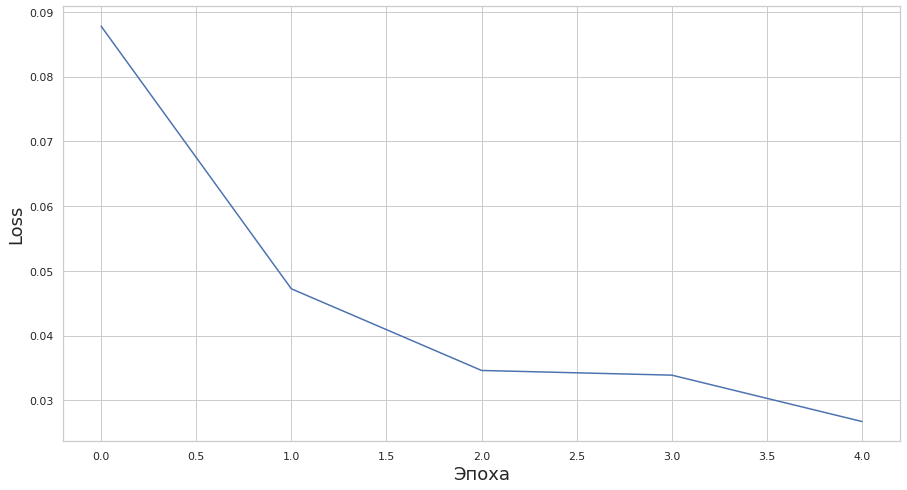

In [ ]:
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))


plt.ylabel('Loss', fontsize=18)
plt.xlabel('Эпоха', fontsize=18)

ax= sns.lineplot(x = loss.index, y = loss['loss'], palette='Blues')
plt.ylabel('Loss', fontsize=18)
plt.show()

Выводы DistilBert.
1.   Обучение модели прошло успешно, даже за 1 эпоху loss функция уже достигает достаточного значения. Но было обучено 5 эпох.
2.   Значение ROC-AUC score хоть и не отражает достоверной картины, однако является наилучшим среди полученных на предыдущих этапах работы и составляет 0.98.
3.   Согласно classification report метрика F1-score хоть и не достаточно высока (0.64), однако F1-score по классам не наблюдается провала в классификации малочисленных классов, хотя метрики все еще ниже, чем в многочисленных.



#Выводы



1.   В результате исследования были рассмотрены три способа векторизации текста: Countvectorizer, TF-IDF и предобученная модель BERT. При этом лучше всего с мульти-лабел классификацией справилась последняя модель.
2.   Сравнимо по F1-score справилась с мульти-лабел классификацией модель на основе TF-IDF + логистическая регрессия, она показала чуть ниже значения F1-score по каждому классу, однако основное ее преимущество заключается в отсутсвии необходимости использовать большие вычислительные ресурсы.
3.   Задача мульти-лабел классификации тональности текстов является по-прежнему актуальной. Результаты 'выше среднего', полученные в одной из наиболее эффективных моделей (BERT), это подтверждают.
4.   В данной работе задача мульти-лабел классификации не была полностью решена ввиду сильного дисбаланса как внутри классов токсичности, так и между чистыми (нетоксичными) и токсичными клмментариями.



#Этап 4. Bert+XGBoost

Заключительным этапом работы хотелось выполнить следующее. Сделать эмбеддинги текста с помощью Bert и далее использовать XGBClassifier. Однако, из-за ограничения вычислительных ресурсов, данный этап не был доведен до конца.

###Код

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers
import torch

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (transformers.DistilBertModel, transformers.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_XG = tokenizer_class.from_pretrained(pretrained_weights)
model_XG = model_class.from_pretrained(pretrained_weights)

In [ ]:
tokenized_XG_train = df_train['text'].apply((lambda x: tokenizer_XG.encode(x, add_special_tokens=True)))

In [ ]:

max_len = 0
for i in tokenized_XG_train.values:
    if len(i) > max_len:
        max_len = len(i)

padded_XG_train = np.array([i + [0]*(max_len-len(i)) for i in tokenized_XG_train.values])

In [ ]:
attention_mask_XG_train = np.where(padded_XG_train != 0, 1, 0)
attention_mask_XG_train.shape

(159571, 2502)

In [ ]:
input_ids = torch.tensor(padded_XG_train)  
attention_mask_XG_train = torch.tensor(attention_mask_XG_train)

with torch.no_grad():
    last_hidden_states_train = model_XG(input_ids, attention_mask=attention_mask_XG_train)

In [ ]:
features_train = last_hidden_states_train[0][:,0,:].numpy()

#Литература



1.   Шкарин Сергей. "Ваш первый BERT: иллюстрированное руководство".
2.   В. Д. Олисеенко, Т. В. Тулупьева. "Нейронные сети в приложении к задаче многозначной классификации постов пользователей в социальной сети".
3.   "Глубокое погружение в мульти-лейбл классификации" (https://machinelearningmastery.ru/journey-to-the-center-of-multi-label-classification-384c40229bff/)
4.   Туториал по TF-IDF. (https://edu.vsu.ru/mod/url/view.php?id=309520)
5.   "Анализ тональности текстов с помощью сверточных нейронных сетей" (https://habr.com/ru/company/vk/blog/417767/)


